<a href="https://colab.research.google.com/github/adil-ak/Deep_Learning_Projects/blob/main/DL_Keras_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from tensorflow import keras

fm=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fm.load_data()

In [104]:
x_train.shape

(60000, 28, 28)

In [105]:
x_test.shape

(10000, 28, 28)

In [106]:
y_train.shape

(60000,)

To check how much Categorical Values

In [107]:
import pandas as pd
len(pd.Series(y_train).value_counts())

10

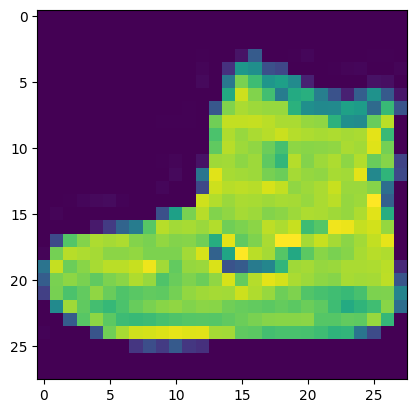

In [108]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [109]:
y_train[0]

9

In [110]:
class_labels=['T-shirt','Trouser','Pullover','Dress','coat','Sandal','Shirt','Sneaker','Bag','Angle Boot']
class_labels[y_train[0]]

'Angle Boot'

In [111]:
import tensorflow as tf
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(150,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [112]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [113]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6578 - loss: 1.0374
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7217 - loss: 0.7530
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7303 - loss: 0.7063
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7493 - loss: 0.6686
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7391 - loss: 0.6836


In [114]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7426 - loss: 0.6827


[0.6905339956283569, 0.7425000071525574]

In [115]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [116]:
import numpy as np
y_pred_labels=[np.argmax(i) for i in y_pred]

In [117]:
y_pred_labels[:5]

[9, 2, 1, 1, 6]

In [118]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [119]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[805,   6,  12, 118,   3,   1,  36,   0,  19,   0],
       [ 25, 922,  15,  31,   3,   0,   2,   0,   2,   0],
       [ 21,   2, 741,  14, 145,   0,  59,   0,  18,   0],
       [ 46,  28,  11, 849,  28,   1,  34,   0,   3,   0],
       [  0,   2, 384,  62, 502,   0,  44,   0,   6,   0],
       [  1,   0,   0,   0,   0, 774,   0,  93,   9, 123],
       [226,   4, 318, 113, 163,   0, 131,   0,  45,   0],
       [  0,   0,   0,   0,   0,  17,   0, 843,   0, 140],
       [  2,   2,   7,  20,   6,   2,  37,   5, 917,   2],
       [  0,   0,   0,   1,   0,   5,   1,  51,   1, 941]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

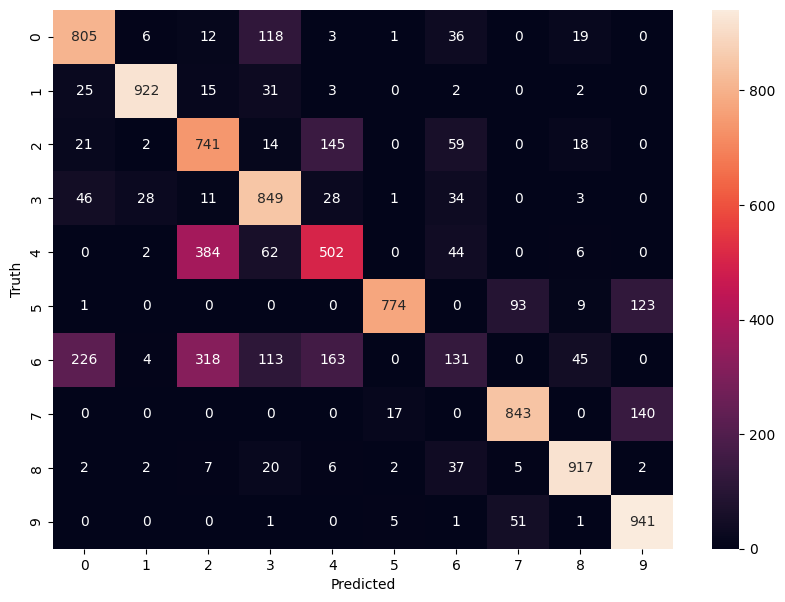

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [121]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 150)                 │         117,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 357,782 (1.36 MB)

 Trainable params: 119,260 (465.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 238,522 (931.73 KB)